# Processing @UnfareNYC Tweets
## CSE184 Final Project Fall 2019

Import libraries and set matplotlib to be inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import twitter
import nltk

%matplotlib inline

#t = twitter(auth=OAuth('144353594-pUtB5UxLeZHwZxJH4vPtFQMXAvgyQKTyvDanafog','TvGH6dRf2J0PTKgBiSwWJ022j25PNBBaYUZQYWML1bDok','0ift2jAgEYQrWs8OP1f9TjRQ1','qq9jNTaS3cG9wVc2Hxij3M0GuhAy72wNzFnBc9y1ejp2xh5dg4'))
#pythonTweets = t.search.tweets(q = "#python")

Get the tweets from @unfarenys and store them in data frame "tweetsdf"

In [2]:
# Connect to twitter's api with given credentials
api = twitter.Api(consumer_key='0ift2jAgEYQrWs8OP1f9TjRQ1',
                      consumer_secret='qq9jNTaS3cG9wVc2Hxij3M0GuhAy72wNzFnBc9y1ejp2xh5dg4',
                      access_token_key='144353594-pUtB5UxLeZHwZxJH4vPtFQMXAvgyQKTyvDanafog',
                      access_token_secret='TvGH6dRf2J0PTKgBiSwWJ022j25PNBBaYUZQYWML1bDok')

# to test if api is connected:
# print(api.VerifyCredentials())

statuses_list = api.GetUserTimeline(count=200,screen_name='unfarenyc') # Load @unfarenyc's timeline
earliest_tweet = min(statuses_list, key=lambda x: x.id).id
while True:
    nexttweets = api.GetUserTimeline(screen_name='unfarenyc', max_id=earliest_tweet, count=200)
    new_earliest = min(nexttweets, key=lambda x: x.id).id
    if not nexttweets or new_earliest == earliest_tweet:
        break
    else:
        earliest_tweet = new_earliest
        #print("getting tweets before:", earliest_tweet)
        statuses_list += nexttweets


tweets = []
for s in statuses_list:
    tweets.append([s.id,s.user.screen_name,s.created_at,s.text,s.retweet_count])
column_names = ['ID','user','created_at','text','retweet_count']
tweetsdf = pd.DataFrame(tweets,columns = column_names)
tweetsdf


,ID,user,created_at,text,retweet_count
0,1199441734255677445,unfarenyc,Tue Nov 26 21:36:08 +0000 2019,"2 cops at Atlantic-Barclays, Pacific St. entra...",0
1,1199440996536328202,unfarenyc,Tue Nov 26 21:33:12 +0000 2019,"Two cops upstairs at the 96th St 1,2,3 station...",0
2,1199437670641995779,unfarenyc,Tue Nov 26 21:19:59 +0000 2019,2 cops at Myrtle Broadway watching turnstiles ...,1
3,1199437427326226432,unfarenyc,Tue Nov 26 21:19:01 +0000 2019,3 cops searching bags at 110 st B/C (4:16pm),1
4,1199437206043144192,unfarenyc,Tue Nov 26 21:18:09 +0000 2019,2 uniformed cops watching turnstiles at 57 St-...,1
...,...,...,...,...,...
1861,1160900038173896704,unfarenyc,Mon Aug 12 13:05:12 +0000 2019,6 cops doing bag checks at Fulton Center (8am),0
1862,1160247030545076225,unfarenyc,Sat Aug 10 17:50:23 +0000 2019,"2 cops at the Brook Ave station, behind the tu...",0
1863,1159948357273554945,unfarenyc,Fri Aug 09 22:03:33 +0000 2019,Two cops on Brooklyn-bound side at the Nostran...,0
1864,1159943167866802178,unfarenyc,Fri Aug 09 21:42:56 +0000 2019,Two cops at Jay St (Willoughby St entrance) be...,0


tokens = tweetsdf['text'].apply(nltk.tokenize.word_tokenize) #
tweets_nltk = nltk.text.Text(tokens) # A list of each tweet's single words
tweetsdf['text_tokenized'] = tweets_nltk
tweetsdf['station_referral'] = np.nan
tweetsdf

In [3]:
# Open the CSV file of subway station names
stations = pd.read_csv("Stations.csv")

# Remove some common regular expressions from our station names
stations['Stop Name'] = stations['Stop Name'].str.replace(" - "," ")
stations['Stop Name'] = stations['Stop Name'].str.replace("/"," ")
stations['Stop Name'] = stations['Stop Name'].str.replace("''","")
stations['Stop Name'] = stations['Stop Name'].str.replace("heights","hts")
stations['Stop Name'] = stations['Stop Name'].str.replace("park","pk")
stations['Stop Name'] = stations['Stop Name'].str.lower()
stations = stations.drop(stations[stations['Stop Name'] == '59 st'].index)
stations = stations.drop(stations[stations['Stop Name'] == '14 st union sq'].index)

# Fix some specific subway stop names


# Initialize a dictionary of police sightings, initialize our sightings to be all 0
stationSightings = dict.fromkeys(stations['Stop Name'],0)

{'astoria ditmars blvd': 0,
 'astoria blvd': 0,
 '30 av': 0,
 'broadway': 0,
 '36 av': 0,
 '39 av': 0,
 'lexington av 59 st': 0,
 '5 av 59 st': 0,
 '57 st 7 av': 0,
 '49 st': 0,
 'times sq 42 st': 0,
 '34 st herald sq': 0,
 '28 st': 0,
 '23 st': 0,
 '8 st nyu': 0,
 'prince st': 0,
 'canal st': 0,
 'city hall': 0,
 'cortlandt st': 0,
 'rector st': 0,
 'whitehall st': 0,
 'court st': 0,
 'jay st metrotech': 0,
 'dekalb av': 0,
 'atlantic av barclays ctr': 0,
 'union st': 0,
 '9 st': 0,
 'prospect av': 0,
 '25 st': 0,
 '36 st': 0,
 '45 st': 0,
 '53 st': 0,
 'bay ridge av': 0,
 '77 st': 0,
 '86 st': 0,
 'bay ridge 95 st': 0,
 '7 av': 0,
 'prospect park': 0,
 'parkside av': 0,
 'church av': 0,
 'beverley rd': 0,
 'cortelyou rd': 0,
 'newkirk plaza': 0,
 'avenue h': 0,
 'avenue j': 0,
 'avenue m': 0,
 'kings hwy': 0,
 'avenue u': 0,
 'neck rd': 0,
 'sheepshead bay': 0,
 'brighton beach': 0,
 'ocean pkwy': 0,
 'w 8 st ny aquarium': 0,
 'coney island stillwell av': 0,
 '9 av': 0,
 'fort hamilt

processed_tweets = tweetsdf['text'].str.replace(" - "," ")
processed_tweets = processed_tweets.str.replace("-"," ")
processed_tweets = processed_tweets.str.lower()
processed_tweets = processed_tweets.str.replace("ave","av")
processed_tweets = processed_tweets.str.replace("street","st")
processed_tweets = processed_tweets.str.replace("heights","hts")
tokened_tweets = processed_tweets.apply(nltk.tokenize.word_tokenize)

# to play around with checking if any part of text is in dict.keys()
count = 0
for row in processed_tweets:
    #print(row)
    for word in nltk.tokenize.word_tokenize(row): #.apply(nltk.tokenize.word_tokenize):
        if word[0].isdigit() & word.endswith('th'):
            word = word[:-2]
        elif word[0].isdigit() & word.endswith('nd'):
            word = word[:-2]
        elif word == 'park':
            word = 'pk'
        elif word == 'parkway':
            word = 'pkwy'
    for key in stationSightings.keys():
        numfound = 0
        tokenized_row = nltk.tokenize.word_tokenize(row)
        if key in tokenized_row:
            print(key,tokenized_row)
            numfound += 1
        #numfound = tokenized_row.find(key)
        if numfound > 0:
            stationSightings[key] += 1
            found = 1
            count += 1
            break
    if found == 0:
        print(row)
    
#print(stationSightings)
print(count)

In [4]:
def process_words(unigram):
    if unigram[0].isdigit() & unigram.endswith('st'):
        unigram = unigram[:-2]
    elif unigram[0].isdigit() & unigram.endswith('nd'):
        unigram = unigram[:-2]
    elif unigram[0].isdigit() and unigram.endswith('th'):
        unigram = unigram[:-2]
    elif unigram == 'park':
        unigram = 'pk'
    elif unigram == 'parkway':
        unigram = 'pkwy'
    elif unigram == 'heights':
        unigram = 'hts'
    return unigram
    

In [11]:
from itertools import permutations 

processed_tweets = tweetsdf['text'].str.replace(" - "," ")
processed_tweets = processed_tweets.str.replace("-"," ")
processed_tweets = processed_tweets.str.replace("/"," ")
processed_tweets = processed_tweets.str.replace(".","")
processed_tweets = processed_tweets.str.lower()
processed_tweets = processed_tweets.str.replace("ave","av")
processed_tweets = processed_tweets.str.replace("street","st")
processed_tweets = processed_tweets.str.replace("square","sq")
tokened_tweets = processed_tweets.apply(nltk.tokenize.word_tokenize)

# Let's start with brute force! Like a full on for loop
total_processed = 0 # Set our counter for how many tweets we have found the station for to none
for counter, row in enumerate(tokened_tweets): # For each tweet
    found = 0 # Reset 'found': we haven't figured out which station this tweet is referring to yet! 
    station_name = 'None'
    for fourgram in nltk.ngrams(row,4): # For each fourgram in the tweet
        if found == 1: # If we found the station at the last iteration
            total_processed += 1 # Add to our counter of total processed tweets
            tweetsdf.loc[counter,'station_referral'] = station_name
            break # Break out of this loop, time to decipher the next tweet!
        one, two, three, four = fourgram # Split apart the fourgram for processing
        one = process_words(one) # Process unigram one, two, three and four
        two = process_words(two) # According to our function defined above.
        three = process_words(three)
        four = process_words(four)
        for order in permutations([one,two,three,four]):
            perm_one, perm_two, perm_three, perm_four = order
            if perm_one+" "+perm_two+" "+perm_three+" "+perm_four in stationSightings.keys():
                stationSightings[perm_one+" "+perm_two+" "+perm_three+" "+perm_four] += 1
                tweetsdf.loc[counter,'station_referral'] = perm_one+" "+perm_two+" "+perm_three+" "+perm_four
                total_processed += 1
                found = 1
                break
    if found != 1:
        for trigram in nltk.trigrams(row): # for each trigram made of the tweet's tokens
            if found == 1: # If we've since found the tweet's subway station
                    #total_processed += 1 # Add to our counter of number of tweets we have found the station for
                    #tweetsdf.loc[counter,'station_referral'] = station_name
                break # break outta here, onto the next tweet!
            one, two, three = trigram # unpack the 3 stations 
            one = process_words(one)
            two = process_words(two)
            three = process_words(three)
            for order in permutations([one,two,three]):
                perm_one, perm_two, perm_three = order
                if perm_one+" "+perm_two+" "+perm_three in stationSightings.keys():
                    stationSightings[perm_one+" "+perm_two+" "+perm_three] += 1
                    tweetsdf.loc[counter,'station_referral'] = perm_one+" "+perm_two+" "+perm_three
                    total_processed += 1
                    found = 1
                    break
    if found != 1:
        for bigram in nltk.bigrams(row): # First check every combo of tokens in the tweet for if they're a subway name
            if found == 1: # if we've already found the tweet's subway station]
                break # break out of this loop, process the next tweet
            one, two = bigram # unpack the bigram in case it's backwards
            one = process_words(one)
            two = process_words(two) 
            for order in permutations([one,two]):
                perm_one, perm_two = order
                if perm_one+" "+perm_two in stationSightings.keys():
                    stationSightings[perm_one+" "+perm_two] += 1
                    tweetsdf.loc[counter,'station_referral'] = str(perm_one+" "+perm_two)
                    total_processed += 1
                    found = 1
                    break
    if found != 1:
        for unigram in row:
            unigram = process_words(unigram)
            if unigram+" st" in stationSightings.keys():
                stationSightings[unigram+" st"] += 1
                tweetsdf.loc[counter,'station_referral'] = unigram+" st"
                station_name = unigram+" st"
                total_processed += 1
                break
            elif unigram+" av" in stationSightings.keys():
                stationSightings[unigram+" av"] += 1
                tweetsdf.loc[counter,'station_referral'] = unigram+" av"
                station_name = unigram+" av"
                total_processed += 1
                break
            elif unigram in stationSightings.keys():
                stationSightings[unigram] += 1
                tweetsdf.loc[counter,'station_referral'] = unigram+" av"
                station_name = unigram
                total_processed += 1
                break

                
print(total_processed)

tweetsdf
#stationSightings
#tokened_tweets

1792


,ID,user,created_at,text,retweet_count,station_referral
0,1199441734255677445,unfarenyc,Tue Nov 26 21:36:08 +0000 2019,"2 cops at Atlantic-Barclays, Pacific St. entra...",0,2 av
1,1199440996536328202,unfarenyc,Tue Nov 26 21:33:12 +0000 2019,"Two cops upstairs at the 96th St 1,2,3 station...",0,96 st
2,1199437670641995779,unfarenyc,Tue Nov 26 21:19:59 +0000 2019,2 cops at Myrtle Broadway watching turnstiles ...,1,2 av
3,1199437427326226432,unfarenyc,Tue Nov 26 21:19:01 +0000 2019,3 cops searching bags at 110 st B/C (4:16pm),1,110 st
4,1199437206043144192,unfarenyc,Tue Nov 26 21:18:09 +0000 2019,2 uniformed cops watching turnstiles at 57 St-...,1,None
...,...,...,...,...,...,...
1861,1160900038173896704,unfarenyc,Mon Aug 12 13:05:12 +0000 2019,6 cops doing bag checks at Fulton Center (8am),0,6 av
1862,1160247030545076225,unfarenyc,Sat Aug 10 17:50:23 +0000 2019,"2 cops at the Brook Ave station, behind the tu...",0,brook av
1863,1159948357273554945,unfarenyc,Fri Aug 09 22:03:33 +0000 2019,Two cops on Brooklyn-bound side at the Nostran...,0,nostrand av
1864,1159943167866802178,unfarenyc,Fri Aug 09 21:42:56 +0000 2019,Two cops at Jay St (Willoughby St entrance) be...,0,NaN


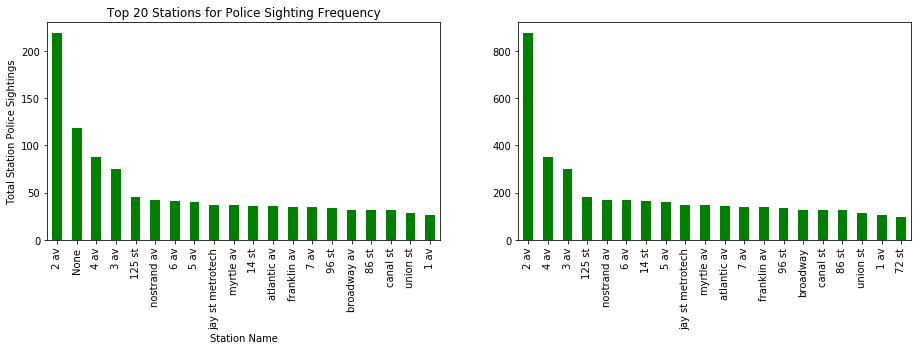

In [17]:
frequent_stations = pd.Series(stationSightings)
frequent_stations[frequent_stations == 0] = np.nan
frequent_stations.dropna(inplace = True)
frequent_stations.nlargest(30)

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
data = tweetsdf['station_referral'].value_counts()
data = data.nlargest(20)
ax.set_title('Top 20 Stations for Police Sighting Frequency')
ax.set_xlabel('Station Name')
ax.set_ylabel('Total Station Police Sightings')
data.plot.bar(ax = ax,color='g')

ax2 = fig.add_subplot(1,2,2)
plt.subplots_adjust(left = 3, right = 5)
data2 = pd.Series(stationSightings).nlargest(20)
data2.plot.bar(ax=ax2,color='g')

- creating filter (letting users choose things)
- pie chart of sightings per week
- try named entity recognition

#### We convert the "created_at" column to datetime

In [13]:
# Let's try to parse into weekly bins!
from datetime import datetime

month_number = { 'Jan' : 1, 'Feb' : 2, 'Mar' : 3, 'Apr' : 4,
                'May': 5, 'Jun' : 6, 'Jul' : 7, 'Aug' : 8,
                'Sep' : 9, 'Oct' : 10, 'Nov' : 11, 'Dec' : 12}

tweetsdf['created_at_datetime'] = np.nan
for k, instance in enumerate(tweetsdf['created_at']): # for each tweet's creation time/day
    for i, chunk in enumerate(instance.split(" ")): # parse through the datetime, split by space
        if i == 1:
            this_month = month_number[chunk]
        elif i == 2:
            this_day = int(chunk)
        elif i == 3:
            for j, time in enumerate(chunk.split(":")):
                if j == 0:
                    this_hour = int(time)
                elif j == 1:
                    this_min = int(time)
                elif j == 2:
                    this_second = int(time)
        elif i == 5:
            this_year = int(chunk)
    tweet_datetime = datetime(year = this_year, month = this_month, day = this_day, hour = this_hour, minute = this_min, second = this_second)
    tweetsdf.loc[k,'created_at_datetime'] = tweet_datetime

tweetsdf

,ID,user,created_at,text,retweet_count,station_referral,created_at_datetime
0,1199441734255677445,unfarenyc,Tue Nov 26 21:36:08 +0000 2019,"2 cops at Atlantic-Barclays, Pacific St. entra...",0,2 av,2019-11-26 21:36:08
1,1199440996536328202,unfarenyc,Tue Nov 26 21:33:12 +0000 2019,"Two cops upstairs at the 96th St 1,2,3 station...",0,96 st,2019-11-26 21:33:12
2,1199437670641995779,unfarenyc,Tue Nov 26 21:19:59 +0000 2019,2 cops at Myrtle Broadway watching turnstiles ...,1,2 av,2019-11-26 21:19:59
3,1199437427326226432,unfarenyc,Tue Nov 26 21:19:01 +0000 2019,3 cops searching bags at 110 st B/C (4:16pm),1,110 st,2019-11-26 21:19:01
4,1199437206043144192,unfarenyc,Tue Nov 26 21:18:09 +0000 2019,2 uniformed cops watching turnstiles at 57 St-...,1,None,2019-11-26 21:18:09
...,...,...,...,...,...,...,...
1861,1160900038173896704,unfarenyc,Mon Aug 12 13:05:12 +0000 2019,6 cops doing bag checks at Fulton Center (8am),0,6 av,2019-08-12 13:05:12
1862,1160247030545076225,unfarenyc,Sat Aug 10 17:50:23 +0000 2019,"2 cops at the Brook Ave station, behind the tu...",0,brook av,2019-08-10 17:50:23
1863,1159948357273554945,unfarenyc,Fri Aug 09 22:03:33 +0000 2019,Two cops on Brooklyn-bound side at the Nostran...,0,nostrand av,2019-08-09 22:03:33
1864,1159943167866802178,unfarenyc,Fri Aug 09 21:42:56 +0000 2019,Two cops at Jay St (Willoughby St entrance) be...,0,NaN,2019-08-09 21:42:56


In [16]:
pd.Series(stationSightings).nsmallest(50)
stationSightings['freeman st']
pd.Series(stationSightings).nlargest(30)

2 av                     876
4 av                     352
3 av                     302
125 st                   180
nostrand av              168
6 av                     167
14 st                    166
5 av                     161
jay st metrotech         148
myrtle av                148
atlantic av              144
7 av                     140
franklin av              140
96 st                    136
broadway                 128
canal st                 128
86 st                    128
union st                 116
1 av                     104
72 st                     96
59 st columbus circle     95
135 st                    84
church av                 76
dekalb av                 68
50 st                     68
fulton st                 68
116 st                    68
grand st                  67
union sq 14 st            66
utica av                  62
dtype: int64

2 av                        876
4 av                        352
3 av                        302
125 st                      180
nostrand av                 168
6 av                        167
14 st                       166
5 av                        161
jay st metrotech            148
myrtle av                   148
atlantic av                 144
7 av                        140
franklin av                 140
96 st                       136
broadway                    128
canal st                    128
86 st                       128
union st                    116
1 av                        104
72 st                        96
59 st columbus circle        95
135 st                       84
church av                    76
dekalb av                    68
50 st                        68
fulton st                    68
116 st                       68
grand st                     67
union sq 14 st               66
utica av                     62
prospect av                  60
34 st he